# Statistics

In [1]:
import pandas as pd
games_df = pd.read_csv("games.csv")
rounds_df = pd.read_csv("rounds_in_games.csv")

## Words


Distribution of words by number of letters.

In [2]:
words_df = pd.DataFrame(rounds_df["word"])
words_df["word_length"] = words_df["word"].apply(len)
word_length_distribution = (
    words_df.groupby("word_length").size().reset_index(name="count")
)
print(word_length_distribution)

   word_length  count
0            3      1
1            4      2
2            5      9
3            6      3
4            7      3
5            9      6
6           10      2
7           11      1


## Rounds

Number of distinct users who have played.

In [3]:
distinct_usernames = games_df["username"].unique()
print(len(distinct_usernames))

5


Top 5 players by rounds won per game.

In [4]:
rounds_won_per_game = (
    rounds_df.groupby(["game_id", "username"]).agg({"victory": "sum"}).reset_index()
)

average_rounds_won = (
    rounds_won_per_game.groupby("username")["victory"].mean().reset_index()
)

top_players = average_rounds_won.nlargest(5, "victory")

print(top_players)

  username  victory
3     pepe      2.0
1    luigi      1.2
0     adam      1.0
2     nick      1.0
4      zen      1.0


## Game

Top 5 players by final score.

In [5]:
top_players = games_df.sort_values(by="final_score", ascending=False).head(5)[
    ["username", "final_score"]
]

print(top_players)

  username  final_score
2    luigi            3
5     pepe            2
6     nick            2
0      zen            1
1    luigi            1


Top 5 users by mean score.

In [6]:
average_score_per_user = (
    games_df.groupby("username")["final_score"].mean().reset_index()
)

top_users = average_score_per_user.nlargest(5, "final_score")

print(top_users)

  username  final_score
3     pepe     2.000000
1    luigi     1.666667
0     adam     1.000000
2     nick     1.000000
4      zen     1.000000


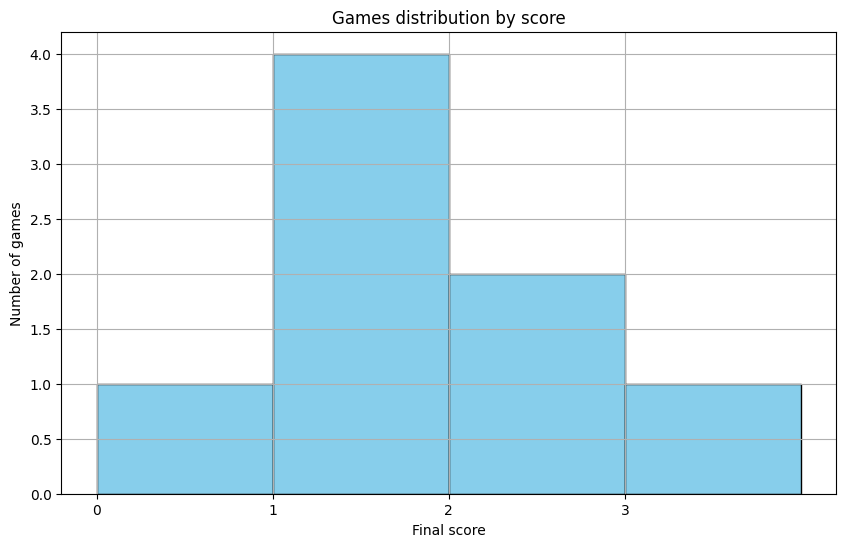

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(
    games_df["final_score"], bins=[0, 1, 2, 3, 4], color="skyblue", edgecolor="black"
)

plt.title("Games distribution by score")
plt.xlabel("Final score")
plt.ylabel("Number of games")

plt.xticks(range(4))

plt.grid(True)
plt.show()